In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats



In [2]:

# the relative path of the stroke csv dataset is saved into the variable data for ease of use
data = '../data/processed/stroke_copy_processed.csv'

# The data is read and saved in a variable (stroke)
stroke_processed = pd.read_csv(data)

stroke_processed = pd.DataFrame(stroke_processed)

stroke_processed

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_category,bmi_category,glucose_category
0,9046,Male,67.0,0,1,Yes,Private,Urban,229,37,formerly smoked,1,Senior,Obesity,Diabetic
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202,34,never smoked,1,Adult,Obesity,Diabetic
2,31112,Male,80.0,0,1,Yes,Private,Rural,106,32,never smoked,1,Senior,Obesity,Healthy
3,60182,Female,49.0,0,0,Yes,Private,Urban,171,34,smokes,1,Adult,Obesity,Pre-Diabetic
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174,24,never smoked,1,Senior,Healthy Weight,Pre-Diabetic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,84,27,never smoked,0,Senior,Overweight,Healthy
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125,40,never smoked,0,Senior,Obesity,Healthy
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,83,31,never smoked,0,Adult,Obesity,Healthy
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166,26,formerly smoked,0,Adult,Overweight,Pre-Diabetic


In [3]:
stroke = stroke_processed.copy()
stroke_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   int64  
 9   bmi                5110 non-null   int64  
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
 12  age_category       5110 non-null   object 
 13  bmi_category       5110 non-null   object 
 14  glucose_category   5110 non-null   object 
dtypes: float64(1), int64(6), object(8)
memory usage: 599.0+ KB


In [4]:
# Exclude rows with age less than 18
filtered_stroke = stroke[stroke['age'] >= 18]

filtered_stroke

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_category,bmi_category,glucose_category
0,9046,Male,67.0,0,1,Yes,Private,Urban,229,37,formerly smoked,1,Senior,Obesity,Diabetic
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202,34,never smoked,1,Adult,Obesity,Diabetic
2,31112,Male,80.0,0,1,Yes,Private,Rural,106,32,never smoked,1,Senior,Obesity,Healthy
3,60182,Female,49.0,0,0,Yes,Private,Urban,171,34,smokes,1,Adult,Obesity,Pre-Diabetic
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174,24,never smoked,1,Senior,Healthy Weight,Pre-Diabetic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,84,27,never smoked,0,Senior,Overweight,Healthy
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125,40,never smoked,0,Senior,Obesity,Healthy
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,83,31,never smoked,0,Adult,Obesity,Healthy
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166,26,formerly smoked,0,Adult,Overweight,Pre-Diabetic


In [5]:
# Confirmation
print(filtered_stroke['age'].min())


18.0


In [6]:
# Separate positive and negative stroke cases - using a balanced approach (247 positive and 247 negative cases) 
positive = filtered_stroke[filtered_stroke['stroke'] == 1]
negative = filtered_stroke[filtered_stroke['stroke'] == 0].sample(n=247, random_state=42)

# Combine and shuffle
balanced_df = pd.concat([positive, negative]).sample(frac=1, random_state=42).reset_index(drop=True)

In [7]:
balanced_df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_category,bmi_category,glucose_category
0,6886,Male,19.0,0,0,No,Private,Rural,84,32,never smoked,0,Youth,Obesity,Healthy
1,50784,Male,63.0,0,0,Yes,Private,Rural,229,27,never smoked,1,Adult,Overweight,Diabetic
2,29540,Male,67.0,0,0,Yes,Private,Rural,97,27,smokes,0,Senior,Overweight,Healthy
3,62466,Female,80.0,0,0,Yes,Private,Urban,64,45,never smoked,1,Senior,Obesity,Low
4,37680,Male,55.0,0,0,Yes,Govt_job,Rural,108,41,formerly smoked,0,Adult,Obesity,Healthy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,42072,Female,50.0,1,0,Yes,Private,Rural,73,30,formerly smoked,1,Adult,Obesity,Healthy
490,10135,Female,37.0,0,0,No,Private,Rural,112,29,Unknown,0,Adult,Overweight,Healthy
491,1679,Male,35.0,0,0,Yes,Private,Rural,77,29,formerly smoked,0,Adult,Overweight,Healthy
492,8168,Female,34.0,0,0,Yes,Private,Rural,113,23,formerly smoked,0,Adult,Healthy Weight,Healthy


In [8]:


# Define feature groups
numerical_features = ['age', 'avg_glucose_level', 'bmi']
categorical_features = [
    'gender', 'ever_married', 'work_type', 'residence_type',
    'smoking_status', 'age_category', 'bmi_category', 'glucose_category'
]

# Transformers
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Full pipeline with a classifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(class_weight='balanced', max_iter=1000))
])


In [9]:
# Model Evaluation with Cross-Validation - Model 3
from sklearn.model_selection import cross_validate

# Drop ID column and separate target
X = balanced_df.drop(columns=['id', 'stroke'])
y = balanced_df['stroke']

# Define StratifiedKFold
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

scoring = {
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score),
    'accuracy': make_scorer(accuracy_score)
}


# Evaluate using cross_val_score
# results = cross_val_score(pipeline, X, y, cv=skf, scoring='f1') # or 'accuracy', 'roc_auc', etc.
# print("Cross-validated F1 scores:", scores)
# print("Mean F1 score:", scores.mean())

# Evaluate using cross_validate
results = cross_validate(pipeline, X, y, cv=skf, scoring=scoring) 


print("Precision scores:", results['test_precision'])
print("Recall scores:", results['test_recall'])
print("F1 scores:", results['test_f1'])
print("Accuracy scores:", results['test_accuracy'])

print("Mean Precision:", results['test_precision'].mean())
print("Mean Recall:", results['test_recall'].mean())
print("Mean F1:", results['test_f1'].mean())
print("Mean Accuracy:", results['test_accuracy'].mean())

Precision scores: [0.59375    0.65714286 0.69565217 0.72       0.76666667 0.73913043
 0.65517241 0.86956522 0.72413793 0.72413793]
Recall scores: [0.76       0.92       0.64       0.72       0.95833333 0.70833333
 0.79166667 0.8        0.84       0.84      ]
F1 scores: [0.66666667 0.76666667 0.66666667 0.72       0.85185185 0.72340426
 0.71698113 0.83333333 0.77777778 0.77777778]
Accuracy scores: [0.62       0.72       0.68       0.72       0.83673469 0.73469388
 0.69387755 0.83673469 0.75510204 0.75510204]
Mean Precision: 0.7145355625758549
Mean Recall: 0.7978333333333334
Mean F1: 0.7501126128135361
Mean Accuracy: 0.7352244897959184


Why Model 2 looks better than Model 3
• With a single split, we happened to get a test set where the model performed well (F1 ≈ 0.78).
• With cross-validation, we see the true variability: sometimes the model does better, sometimes worse, but on average it’s slightly lower (F1 ≈ 0.75).
• Cross-validation is more trustworthy because it reduces the risk of overestimating performance due to a lucky split.

Key Takeaway
• Model 2: Good for a quick snapshot, but results can be misleading.
• Model 3: More robust, gives us confidence intervals and averages, which matter in healthcare where reliability is critical.
So while Model 2a’s numbers look higher, Model 2b is the better reflection of reality. If we present results to stakeholders, we’d lean on cross-validation because it shows stability and generalization.

In [10]:
# Model 3 Evaluation - Summary with 95% Confidence Intervals
f1_scores = results['test_f1']

mean_f1 = np.mean(f1_scores)
std_f1 = np.std(f1_scores)

# 95% confidence interval using normal approximation
ci_low, ci_high = mean_f1 - 1.96*std_f1, mean_f1 + 1.96*std_f1

print(f"F1 mean: {mean_f1:.3f}")
print(f"95% CI: [{ci_low:.3f}, {ci_high:.3f}]")

F1 mean: 0.750
95% CI: [0.633, 0.867]


In [11]:

def summarize_with_ci(scores, metric_name): # Function to summarize scores with 95% CI (Confidence Interval)
    mean = np.mean(scores)
    std = np.std(scores)
    ci_low, ci_high = mean - 1.96*std, mean + 1.96*std
    print(f"{metric_name}: {mean:.3f} (95% CI: [{ci_low:.3f}, {ci_high:.3f}])")

# Precision
summarize_with_ci(results['test_precision'], "Precision")

# Recall
summarize_with_ci(results['test_recall'], "Recall")

# F1
summarize_with_ci(results['test_f1'], "F1")

# Accuracy
summarize_with_ci(results['test_accuracy'], "Accuracy")

Precision: 0.715 (95% CI: [0.577, 0.852])
Recall: 0.798 (95% CI: [0.617, 0.978])
F1: 0.750 (95% CI: [0.633, 0.867])
Accuracy: 0.735 (95% CI: [0.611, 0.859])


This produces point estimates + uncertainty ranges.
Interpretation:
This means: “On average, the model achieves an F1 of 0.75, but depending on the fold, it could realistically range between 0.633 and 0.867.”
• In healthcare, this is critical — stakeholders can see not just the average but the variability, which builds trust.

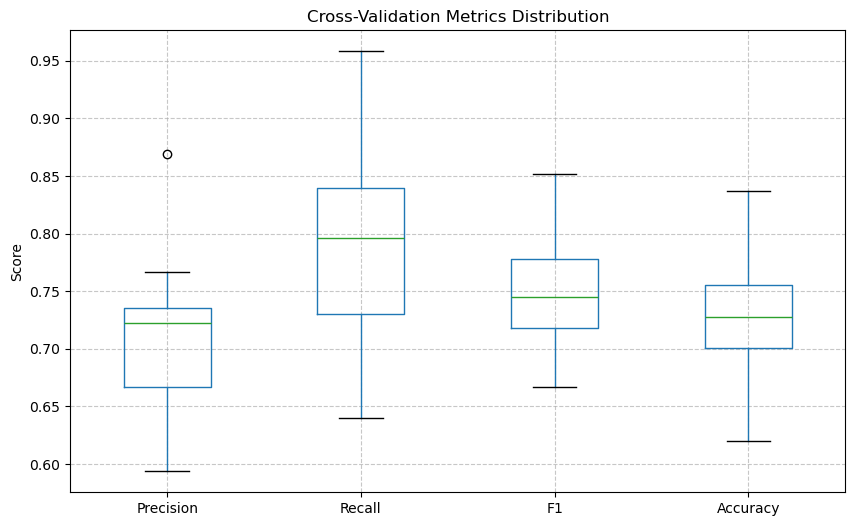

In [12]:
import matplotlib.pyplot as plt

# Convert results into a DataFrame
df_scores = pd.DataFrame({
    "Precision": results['test_precision'],
    "Recall": results['test_recall'],
    "F1": results['test_f1'],
    "Accuracy": results['test_accuracy']
})

# Plot directly
df_scores.boxplot(figsize=(10,6))
plt.title("Cross-Validation Metrics Distribution")
plt.ylabel("Score")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()


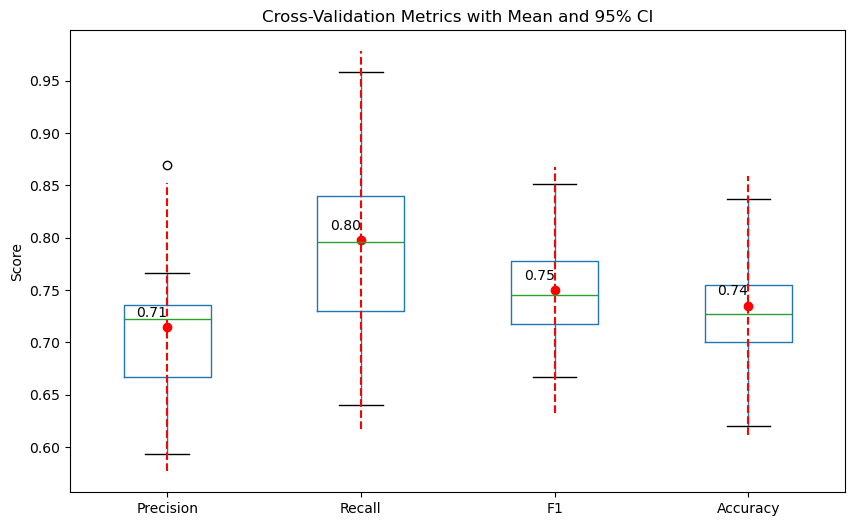

In [13]:

# Convert results into a DataFrame for convenience
df_scores = pd.DataFrame({
    "Precision": results['test_precision'],
    "Recall": results['test_recall'],
    "F1": results['test_f1'],
    "Accuracy": results['test_accuracy']
})

# Create boxplot
plt.figure(figsize=(10, 6))
box = df_scores.boxplot(grid=False)

# Overlay mean and 95% CI for each metric
for i, column in enumerate(df_scores.columns, start=1):
    scores = df_scores[column].values
    mean = np.mean(scores)
    std = np.std(scores)
    ci_low, ci_high = mean - 1.96*std, mean + 1.96*std
    
    # Plot mean as a red dot
    plt.plot(i, mean, 'ro')
    
    # Plot CI as a vertical line
    plt.vlines(i, ci_low, ci_high, colors='r', linestyles='--')
    
    # Annotate mean
    plt.text(i, mean+0.01, f"{mean:.2f}", ha='right', color='black')

plt.title("Cross-Validation Metrics with Mean and 95% CI")
plt.ylabel("Score")
plt.show()

Boxplot: shows distribution across folds.
• Red dot: mean score for each metric across folds.
• Dashed vertical line: 95% confidence interval.
• Text label: mean value for quick reading.

- Red dot(mean) and median (horizontal line within the box) being close indicate the distribution is symmetric, rather than skewwed
- Precision and F1: More consistent, because their boxes are shorter.
- Recall: Strong average (~0.80) but less consistent, because the box is taller.

The boxplots show the distribution of cross‑validation scores. Shorter (vertically narrower) boxes and tighter confidence intervals mean more stable performance across folds. Recall has the highest mean but also the widest spread, so it is less consistent. Precision and F1 have shorter boxes, making them more reliable across folds. Accuracy looks decent, though its wider confidence interval indicates more uncertainty depending on the fold. This visualization helps us evaluate not just the average metric, but also its consistency and reliability. Stakeholders can see not only the spread of scores but also the central tendency and uncertainty.

This chart summarizes how the model performs across multiple validation folds. Each box shows the spread of scores, the red dot is the average, and the dashed line is the confidence interval. For example, recall is consistently high around 0.80, meaning the model captures most of the true positives. Precision is lower at 0.71, which suggests some false positives. The F1 score balances those two at about 0.75. Accuracy is around 0.74, but the confidence interval shows it could realistically range between 0.63 and 0.84. Overall, the model is strong at finding positives, but there’s a trade‑off with precision.

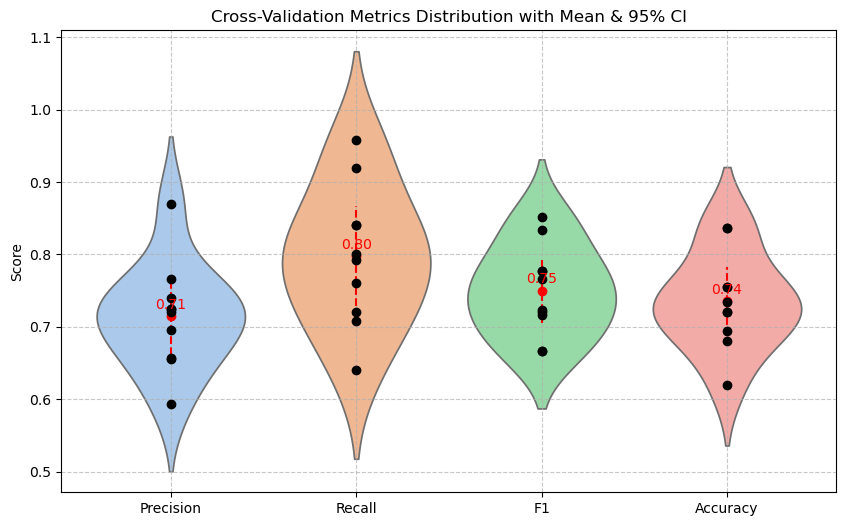

In [14]:


# Convert results into a DataFrame
df_scores = pd.DataFrame({
    "Precision": results['test_precision'],
    "Recall": results['test_recall'],
    "F1": results['test_f1'],
    "Accuracy": results['test_accuracy']
})

# Prepare data for violin plot
metrics = df_scores.columns
data = [df_scores[m] for m in metrics]

plt.figure(figsize=(10, 6))
sns.violinplot(data=data, inner=None, palette='pastel')

# Overlay scatter points for each fold
for i, metric_scores in enumerate(data):
    plt.scatter([i]*len(metric_scores), metric_scores, color='black', zorder=3)

# Annotate mean and 95% CI
for i, metric_scores in enumerate(data):
    mean = np.mean(metric_scores)
    ci_low, ci_high = stats.t.interval(0.95, len(metric_scores)-1, loc=mean, scale=stats.sem(metric_scores))
    
    # Plot mean as red dot
    plt.plot(i, mean, 'ro')
    
    # Plot CI as dashed vertical line
    plt.vlines(i, ci_low, ci_high, colors='r', linestyles='--')
    
    # Annotate mean
    plt.text(i, mean+0.01, f"{mean:.2f}", ha='center', color='red')

plt.xticks(range(len(metrics)), metrics)
plt.ylabel("Score")
plt.title("Cross-Validation Metrics Distribution with Mean & 95% CI")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

Critical TODO:
- Choosing the best/optimal fold number for cross validation, 
- Hyperparameter tuning with SearchGridCV
- Build additional models using Ensemble methods (GradientBoosting and/or RandomForest) with bootstrapping

Further ToDOs:
 - Track performance across demographic slices (e.g., gender, age_category)
• Consider using Fairlearn or Aequitas to audit bias
• Use precision if we're prioritizing high-risk patients for intervention

Feature Importance + SHAP
Use model.feature_importances_ or SHAP values to understand what’s driving predictions — especially important in healthcare.

Fairness Auditing
Check performance across subgroups (e.g., gender, age_category) to ensure the model isn’t biased.